In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
def read_data():
    print('Reading files...')    
    order_df = pd.read_csv('../input/machine_learning_challenge_order_data.csv')
    print('Order data has {} rows and {} columns'.format(order_df.shape[0], order_df.shape[1]))
    label_df = pd.read_csv('../input/machine_learning_challenge_labeled_data.csv')
    print('Label data has {} rows and {} columns'.format(label_df.shape[0], label_df.shape[1]))
    df = order_df.merge(label_df, on='customer_id')
    return df

df = read_data()

Reading files...
Order data has 786600 rows and 13 columns
Label data has 245455 rows and 2 columns


In [3]:
profile = ProfileReport(df)
profile.to_file(output_file='output.html')
profile

In [4]:
profile.to_widgets()

***Warnings by pandas-profiling***
- Dataset has 546 (0.1%) duplicate rows
- customer_id has a high cardinality: 245455 distinct values
- order_date has a high cardinality: 776 distinct values
- customer_order_rank has 24767 (3.1%) missing values
- voucher_amount is highly skewed (γ1 = 30.39394065)
- platform_id is highly skewed (γ1 = -22.53663783)
- voucher_amount has 743462 (94.5%) zeros
- delivery_fee has 597536 (76.0%) zeros

- There are 786600 orders from 245455 customers (31.2%)
- There are 24767 missing values in customer_order_rank (3.1%)

/Users/kaan.simsek/anaconda3/envs/forecasting/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:1182: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<AxesSubplot:xlabel='order_date'>

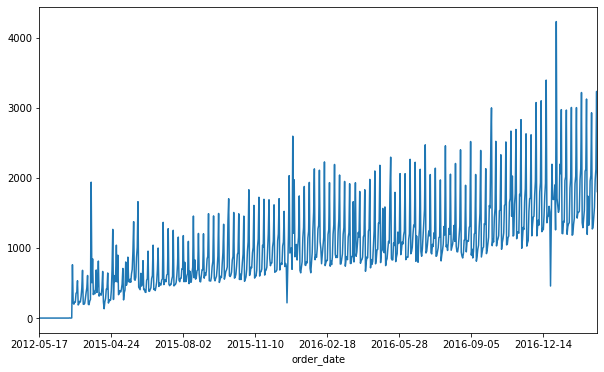

In [34]:
df['demand'] = 1
plt.figure(figsize=(10, 6))
df.groupby('order_date')['demand'].sum().plot()

<AxesSubplot:xlabel='order_hour', ylabel='count'>

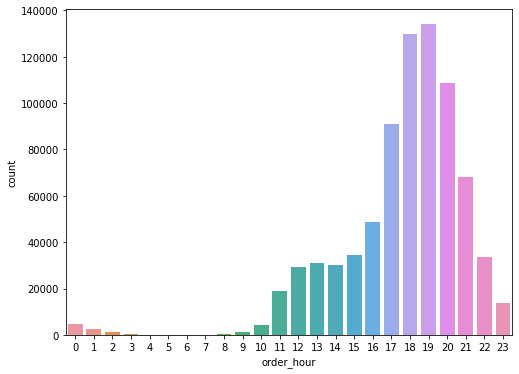

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='order_hour',  data=df)

In [36]:
 ## The 80/20 rule is true again

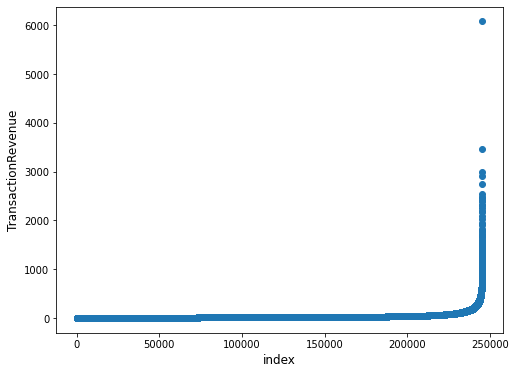

In [37]:
gdf = df.groupby("customer_id")["amount_paid"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(gdf["amount_paid"].values))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()